In [35]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal
import seaborn as sns
import os
import random

def load_random_samples(path, n):
    files = [os.path.join(path, f) for f in os.listdir(path) if f.endswith('.npy')]
    sample_files = random.sample(files, min(n, len(files)))
    samples = [np.load(file).flatten() for file in sample_files]
    return samples

def plot_aggregated_distributions(base_path, classes, n_samples, psd=False):
    plt.figure(figsize=(10, 6))
    all_data = {}
    
    for class_name in classes:
        path = os.path.join(base_path, class_name)
        samples = load_random_samples(path, n_samples)
        if psd:
            samples = [signal.welch(sample, fs=250)[1][:70] for sample in samples]
            samples = [np.log(sample) for sample in samples]
        if samples:
            aggregated_data = np.concatenate(samples)
            all_data[class_name] = aggregated_data
    
    for class_name, data in all_data.items():
        sns.kdeplot(data, label=class_name, fill=True, bw_adjust=1.5, clip=(-100, 100))
    
    plt.title('Aggregated Overlapping Distributions of EEG Samples')
    plt.xlabel('Amplitude')
    # plt.xlim([-100, 100])
    plt.ylabel('Density')
    plt.legend(title='Class')
    plt.show()

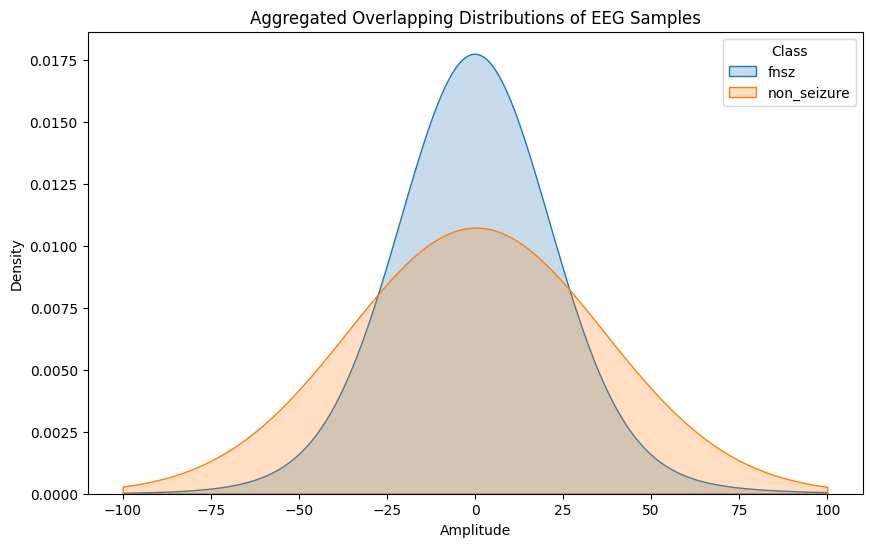

In [36]:
plot_aggregated_distributions('../data/train_250hz_05_70_n60_CZ/', ['fnsz', 'non_seizure'], 1000)

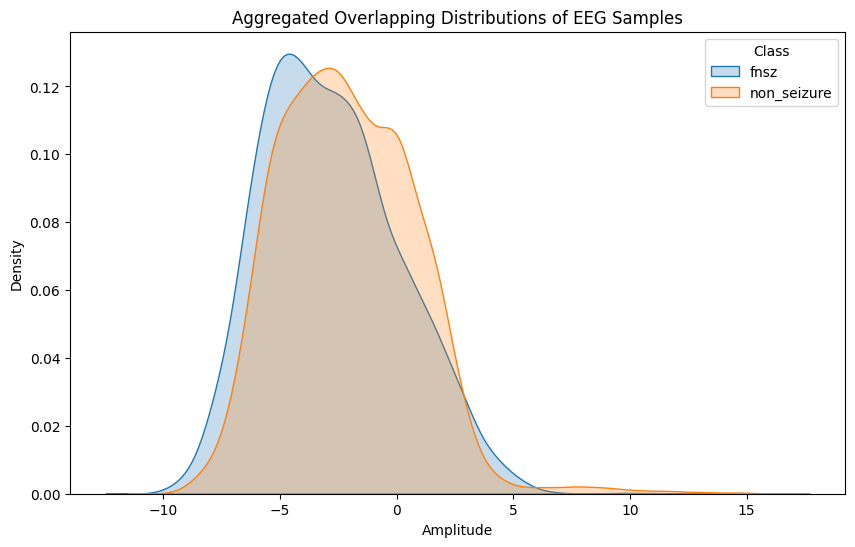

In [41]:
plot_aggregated_distributions('../data/train_250hz_05_70_n60_CZ/', ['fnsz', 'non_seizure'], 1000, psd=True)

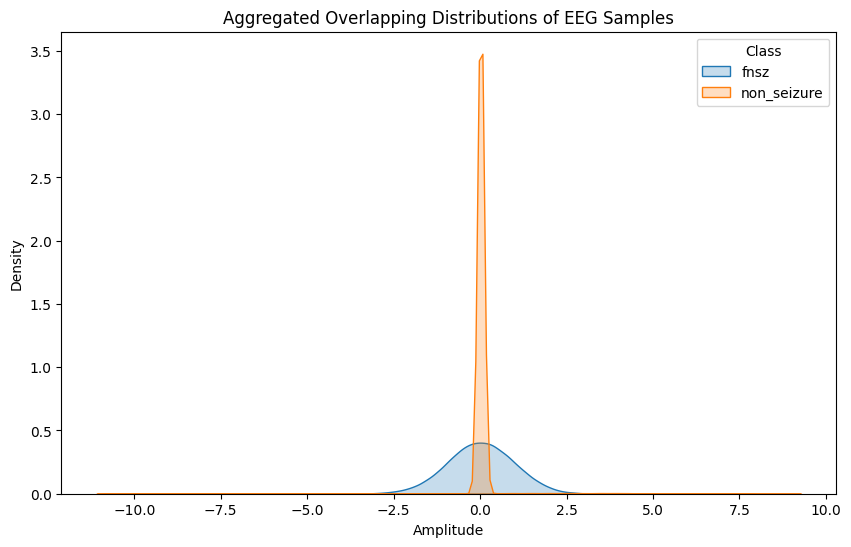

In [43]:
plot_aggregated_distributions('../data/synthetic', ['fnsz', 'non_seizure'], 1000)

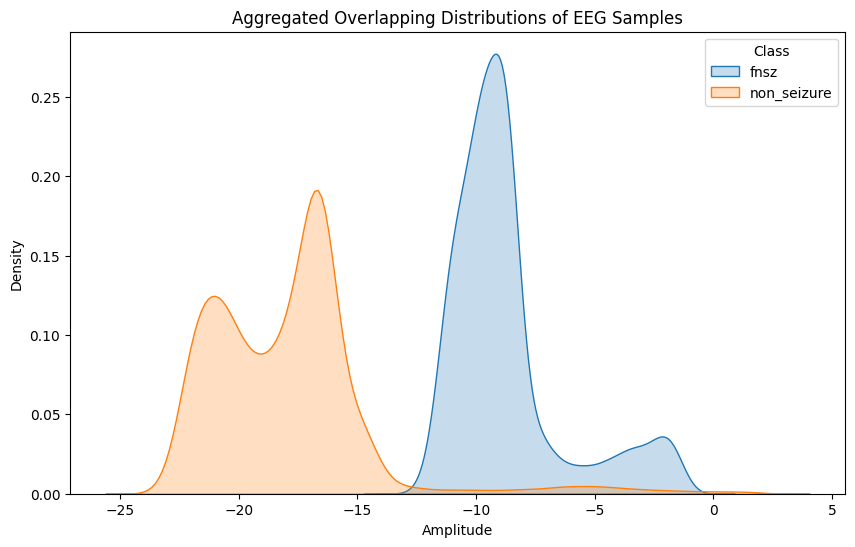

In [42]:
plot_aggregated_distributions('../data/synthetic', ['fnsz', 'non_seizure'], 1000, psd=True)